# Imagerie médicale

L'IRM cérébrale (imagerie par résonance magnétique) est un examen permettant de détecter des anomalies cérébrales et d'en déterminer les causes.
   
![](https://media1.tenor.com/images/540756001c2405111acb87742f3cd18a/tenor.gif?itemid=9565732)

Un des avantages de cette modalité d'imagerie est qu'elle permet de visualiser la matière blanche, la matière grise et le liquide rachidien avec des contrastes différents.

On verra dans ce qui suit comment pouvoir segmenter ces images. Une étape très importante dans le domaine biomédical.
L'objectif est de séparer les trois classes: 
- matière grise (gm)
- matière blanche (wm)
- liquide céphalorachidien (csf)

## Importer une image

Affichez les fichiers qui se trouvent dans le dossier actuel

In [1]:
ls

Histog_IRM.png   Untitled2.ipynb  imagerie.ipynb   mri.ipynb
Untitled.ipynb   brain.jpg        mask.bmp         tumor.png
Untitled1.ipynb  brain2.jpg       mask.png


Les fichiers avec l'extension `.ipyjnb` correspondent aux fichiers iPython Notebook.
Nous voyons plusieurs fichiers en format images avec les extensions
- `.png`
- `.jpg`
- `.bmp`

Maintenant nous pouvons importer les images dans une matrice 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
brain = imread('brain.jpg')

La variable `brain` (*cerveau* en anglais) contient une matrice de l'image.  
Regardons sa dimension.

In [4]:
brain.shape

(202, 165, 3)

**Exercice**  
Créez une variable `tumor` et une variable `brain2` et importez les images correspondantes. Affichez leurs dimensions.

## Afficher une image
Affichons maintenant l'image.

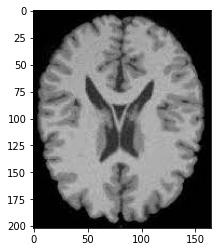

In [5]:
plt.imshow(brain);

**Exercice**  
Affichez les matrices `tumor` et `brain2` comme images.

## Coder l'image en niveaux de gris
Dans ces images les couleurs ne sont pas utiles, elles sont pourtant codées en mode couleurs.
Vérifions que l'image `brain` est codée en mode couleurs.

Au lieu de prendre 3 canaux, on va prendre un seul.

In [6]:
brain = brain[:,:,0]

Affichons sa nouvelle dimension

In [7]:
brain.shape

(202, 165)

Affichons de nouveau cette image noir et blanc

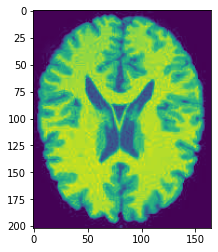

In [8]:
plt.imshow(brain);

**Exercice**  
Transformez les matrices `tumor` et `brain2` en image avec 1 seul canal.  Affichez leur dimension avec `shape`.

On remarque que:
- certains fichiers sont codés sur 3 canaux, et certains sur 4 canaux.
- certains fichiers sont quantifiés avec des valeurs entre 0 et 1 (Tumeur) et d'autres entre 0 et 255.

## Colormap

La palette de couleur peut être choisie en fonction des besoins de l'affichage.
Essaysons les palettes `gray` et `hot`

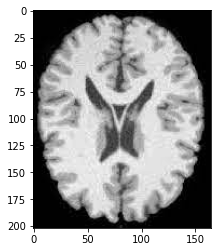

In [9]:
plt.imshow(brain, cmap='gray');

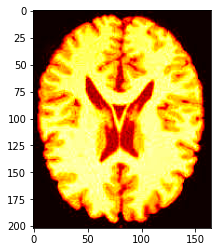

In [10]:
plt.imshow(brain, cmap='hot');

**Exercice**  
Allez sur le site [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html). 
Affichez les matrices `tumor` et `brain2` avec d'autres palettes de couleur.

## Barre de couleurs

La fonction `colorbar` ajoute une échelle de couleurs à l'image. 

La barre des couleurs associe une couleur spécifique à chaque luminosité : 

- 0 - noir
- 75 - rouge
- 150 - jaune
- 200 - blanc

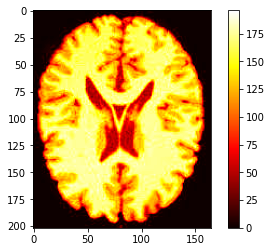

In [11]:
plt.imshow(brain, cmap='hot')
plt.colorbar();

**Exercice**

Donnez la valeur du pixel de coordonnées (100, 100) avec la commande `brain[100, 100]`

## Histogramme d'une image

L'histogramme d'une image represente la distribution des intensités: 
en abscisse on trouve les intensités et en ordonnée le nombre de fois qu'une intensité apparait dans l'image.

Dans une image IRM la distribution des trois tissus (ou classes) est comme suit:


![](Histog_IRM.png)

Observons l'histogramme de l'image `brain` avec la fonction `hist`

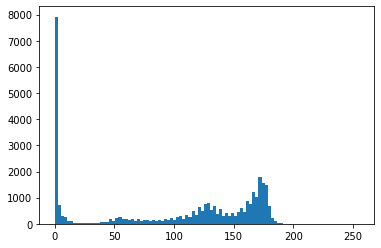

In [12]:
plt.hist(brain.ravel(), bins=100, range=(0, 255));

**Exercice**

Refaites l'histogramme en faisant varier:
- le nombre de bins (80, 50, 25 par exemple) 
- le range ((5, 200) ou (25,200) par exemple)

# Classification

On s'intéresse principalement à extraire les 2 tissus :
- gm (gray matter)
- wm (white matter)


In [13]:
img = brain

seuil1 = 70
seuil2 = 150

gm = img.copy() * 0
wm = img.copy() * 0 

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if seuil1 <= img[i,j] < seuil2:
            gm[i,j]  = 1
        elif seuil2 <= img[i,j] <= 255:
            wm [i,j] = 1


Affichez chacune des classes (tissus)  dans une image; On peut changer les `cmap` (gray, jet, hsv,Pastel1...)

Affichons les 2 tissus dans une même image; puis chacun des tissus cérébraux avec la commande  hstack

In [14]:
gm = gm * 2
wm = wm * 1
segmentation = gm+wm

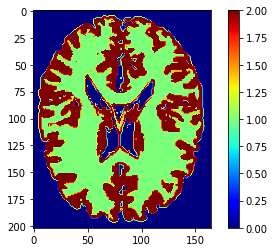

In [15]:
np.unique(segmentation)
plt.imshow(segmentation,cmap = 'jet')

plt.colorbar();

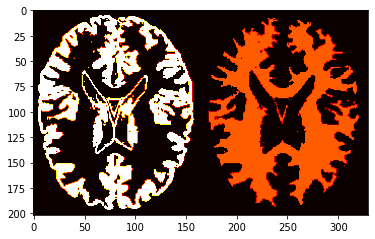

In [16]:
All = np.hstack([gm, wm])
plt.imshow(All, cmap = 'hot');

**Exercice**

Affichez l'histogramme de `tumor`, cherchez les nouveaux seuils de classification.

En modifiant le code de classification, extraire la matière blanche et grise de `tumor` et affichez-les.

## Appliquer un masque à l'image

L'image *brain2* contient le crâne et les tissus cérébraux: pour faire la classification enlevons le crâne avec un mask binaire.

L'image *mask.jpg* contient le masque à appliquer pour extraire seulement le cerveau sans le crâne.


Importons l'image *mask.jpg* et mettons la dans une variable `mask`.


In [17]:
mask = imread('mask.bmp')

Vérifions que l'image est binaire et gardons un seul canal puisque l'image est en noir et blanc

In [18]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [19]:
mask = mask[:,:,0]

**Exercice**

Affichez les deux images `brain2` et `mask` avec la fonction `hstack` et `imshow`

Affichez les dimensions de `brain2` et `mask` avec la fonction `shape` et vérifiez qu'elles sont identiques


Changeons `mask` avec les valeurs 0 et 1 pour pouvoir l'appliquer sur `brain2` avec une simple multiplication

In [20]:
mask = mask > 0

Vérifions que `mask`contient seulement des 0 et 1 

In [21]:
np.unique(mask)

array([False,  True])

**Exercice**

Pour appliquer le masque et extraire le cerveau, créez une variable `brain_only` qui contient la multiplication des deux variables `mask` et `brain2`.

Affichez `brain_only`

Affichons l'histogramme de cette image.


In [24]:
plt.hist(brain_only.ravel(), bins=100, range=(0.0, 256));

**Exercice**

Choisir les nouveaux seuils dans l'histogramme pour extraire les 2 tissus avec le code `classification`. Puis affichez chacune des classes.

Les Ratios de chacun tissus par rapport au volume entier du cerveau sont des marqueurs permettent d'analyser les images IRM pour détécter certaines anomalies telles que la dégénérescence cérébrale.

Calculons le ratio de matière grise.

In [53]:
nombre_gm = np.count_nonzero(gm)
surf_total = np.count_nonzero(gm + wm)
ratio_gm = nombre_gm / surf_total
print(ratio_gm)

0.7304045029574509


**Exercice**
Calculez le ratio de matière blanche.